# Statistical Analysis

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
################ Reading CSV ##################################

#Reading data csv 
Houston_data = "Resources/Houston Data/HOUMergeCleanFINAL.csv"
Houston_data = pd.read_csv(Houston_data,encoding="utf-8")

Chicago_data = "Resources/Chicago Data/CHIMergeCleanFINAL.csv"
Chicago_data = pd.read_csv(Chicago_data,encoding="utf-8")

Atlanta_data = "Resources/Atlanta Data/ATLMergeCleanFINAL.csv"
Atlanta_data = pd.read_csv(Atlanta_data,encoding="utf-8")

NY_data = "Resources/NY Data/NYMergeCleanFINAL.csv"
NY_data = pd.read_csv(NY_data,encoding="utf-8")

Seattle_data = "Resources/Seattle Data/SEMergeCleanFINAL.csv"
Seattle_data = pd.read_csv(Seattle_data,encoding="utf-8")

LA_data = "Resources/Los Angeles Data/LAMergeCleanFINAL.csv"
LA_data = pd.read_csv(LA_data,encoding="utf-8")


In [49]:
Houston_data_groupcity = Houston_data.groupby('City Name')
Houston_data_groupcity = Houston_data_groupcity['Min Price'].mean()
Houston_data_groupcity

Atlanta_data_groupcity = Atlanta_data.groupby('City Name')
Atlanta_data_groupcity = Atlanta_data_groupcity['Min Price'].mean()

NY_data_groupcity = NY_data.groupby('City Name')
NY_data_groupcity = NY_data_groupcity['Min Price'].mean()

LA_data_groupcity = LA_data.groupby('City Name')
LA_data_groupcity = LA_data_groupcity['Min Price'].mean()

Seattle_data_groupcity = Seattle_data.groupby('City Name')
Seattle_data_groupcity = Seattle_data_groupcity['Min Price'].mean()

Chicago_data_groupcity = Chicago_data.groupby('City Name')
Chicago_data_groupcity = Chicago_data_groupcity['Min Price'].mean()

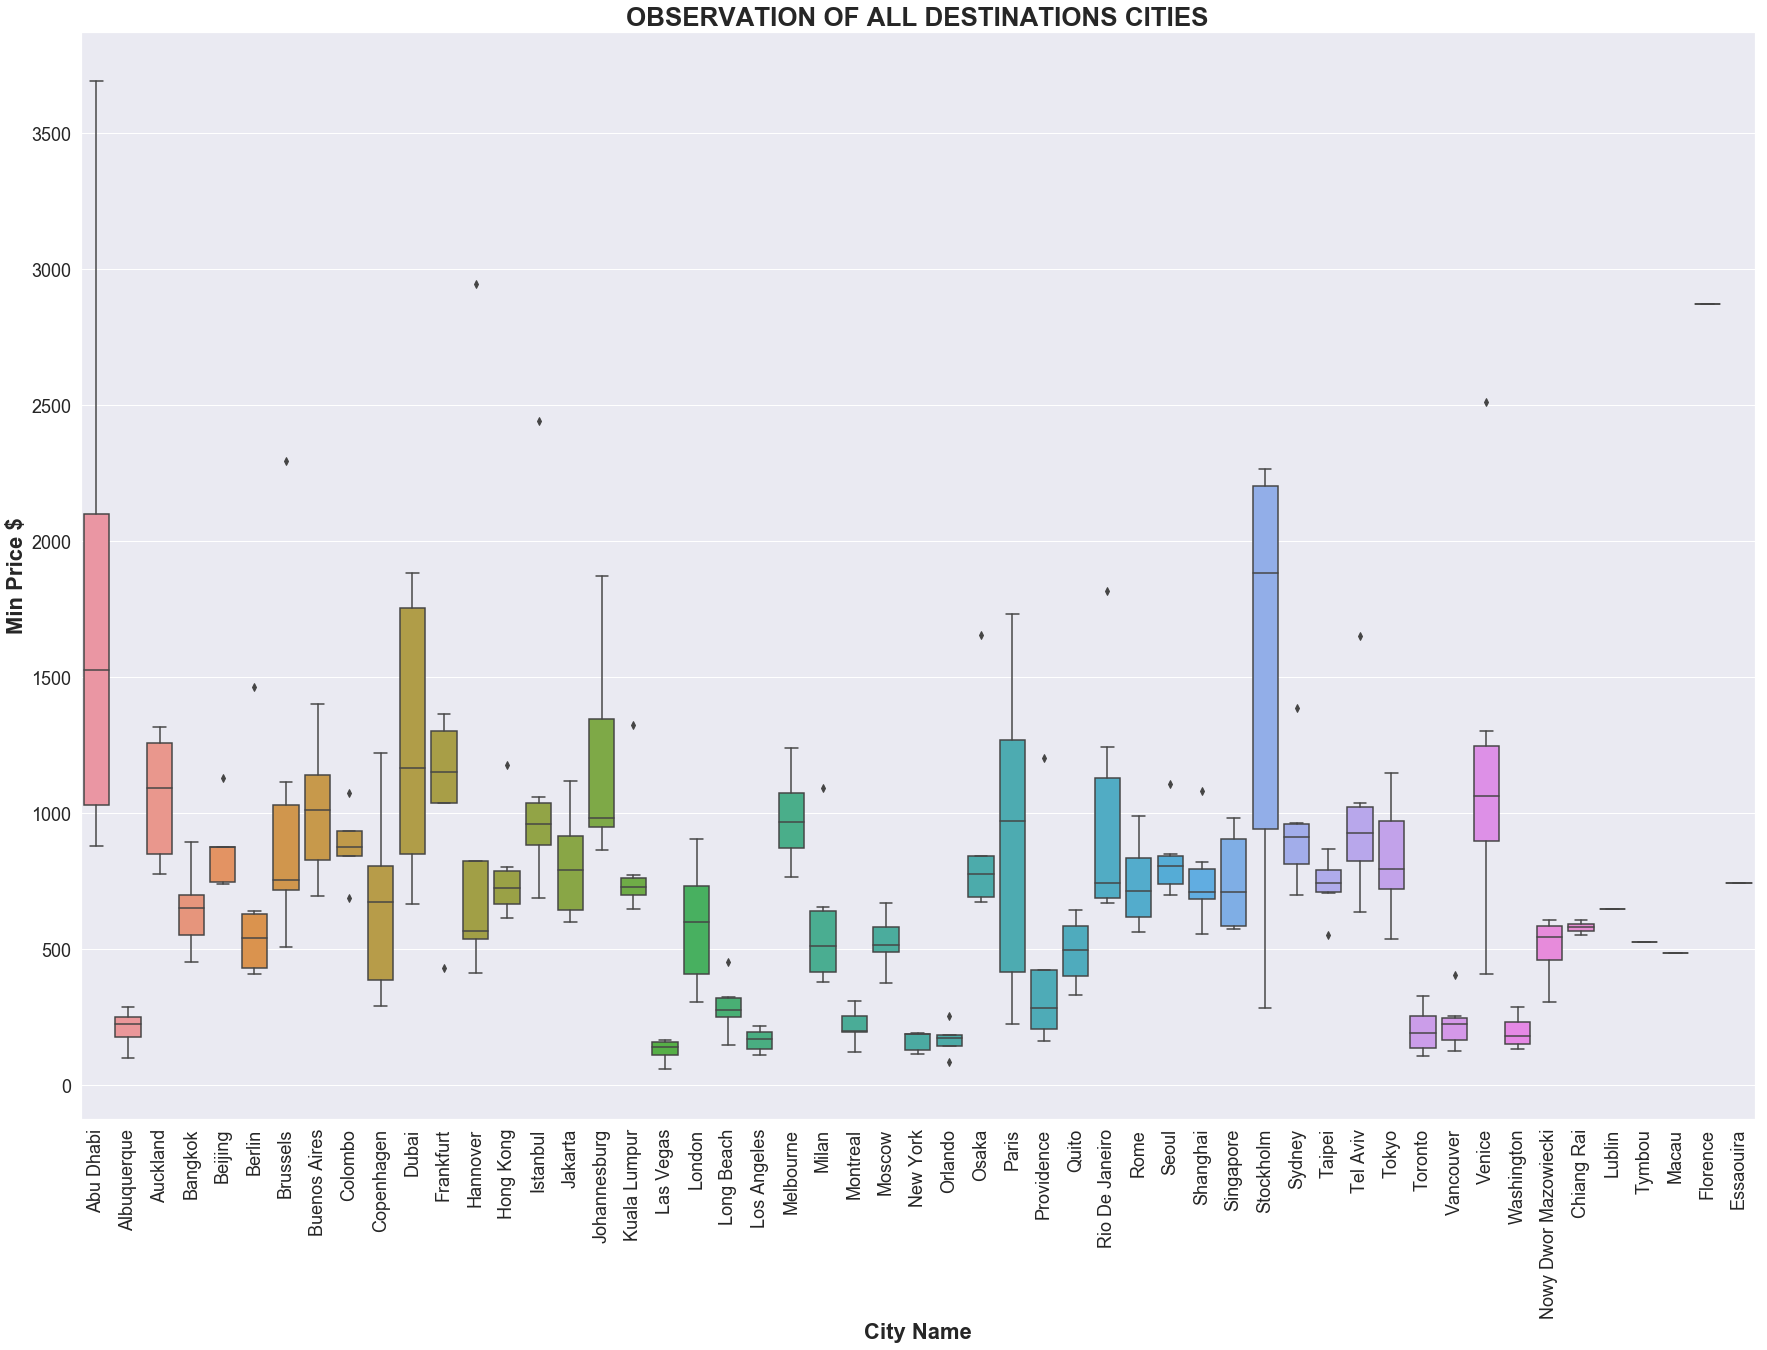

In [107]:
# Append all prices groupped by cities into one data frame
append1 = Houston_data_groupcity.append(Atlanta_data_groupcity)
append2 = append1.append(NY_data_groupcity)
append3 = append2.append(LA_data_groupcity)
append4 = append3.append(Seattle_data_groupcity)
city_and_price = append4.append(Chicago_data_groupcity)
city_and_price_df = pd.DataFrame(city_and_price)
city_and_price_df_reset = city_and_price_df.reset_index()
#city_and_price_df.boxplot("Min Price", by="City Name", figsize=(20, 10))

####################################### Box Plot Graph ##############################################
# Seaborn box plot size 
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(30,20)})
# Start with a basic boxplot
box_plot = sns.boxplot(x=city_and_price_df_reset["City Name"], y = city_and_price_df_reset['Min Price'], data = city_and_price_df_reset, dodge = True, width = 0.8,whis=1.5,fliersize=5 )
#Box plot x ticklabels rotation
plt.setp(box_plot.get_xticklabels(), rotation=90)

#Formatting the boxplot picture
box_plot.set_title("OBSERVATION OF ALL DESTINATIONS CITIES", loc="center", fontsize = 26, fontweight = 'bold')
box_plot.set_xlabel("City Name", fontsize = 22, fontweight = 'bold')
box_plot.set_ylabel("Min Price $", fontsize = 22, fontweight = 'bold')
# Tick Size https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers
box_plot.tick_params(labelsize=18)

# Save Image
plt.savefig("images/boxplotcitiesprices.png", bbox_inches="tight")

In [51]:
################################################## ANOVA TEST ############################################### 
#Perform ANOVA Test
# First Extract individual groups
g1 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Abu Dhabi']['Min Price']
g2 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Auckland']['Min Price']
g3 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Copenhagen']['Min Price']
g4 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Dubai']['Min Price']
g5 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Stockholm']['Min Price']
g6 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Venice']['Min Price']
g7 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Paris']['Min Price']
g8 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Buenos Aires']['Min Price']
g9 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Tokyo']['Min Price']
g10 = city_and_price_df_reset[city_and_price_df_reset['City Name'] == 'Rio De Janeiro']['Min Price']

#Perform the ANOVA
stats.f_oneway(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10)

F_onewayResult(statistic=1.9541614193332029, pvalue=0.0652234332283013)

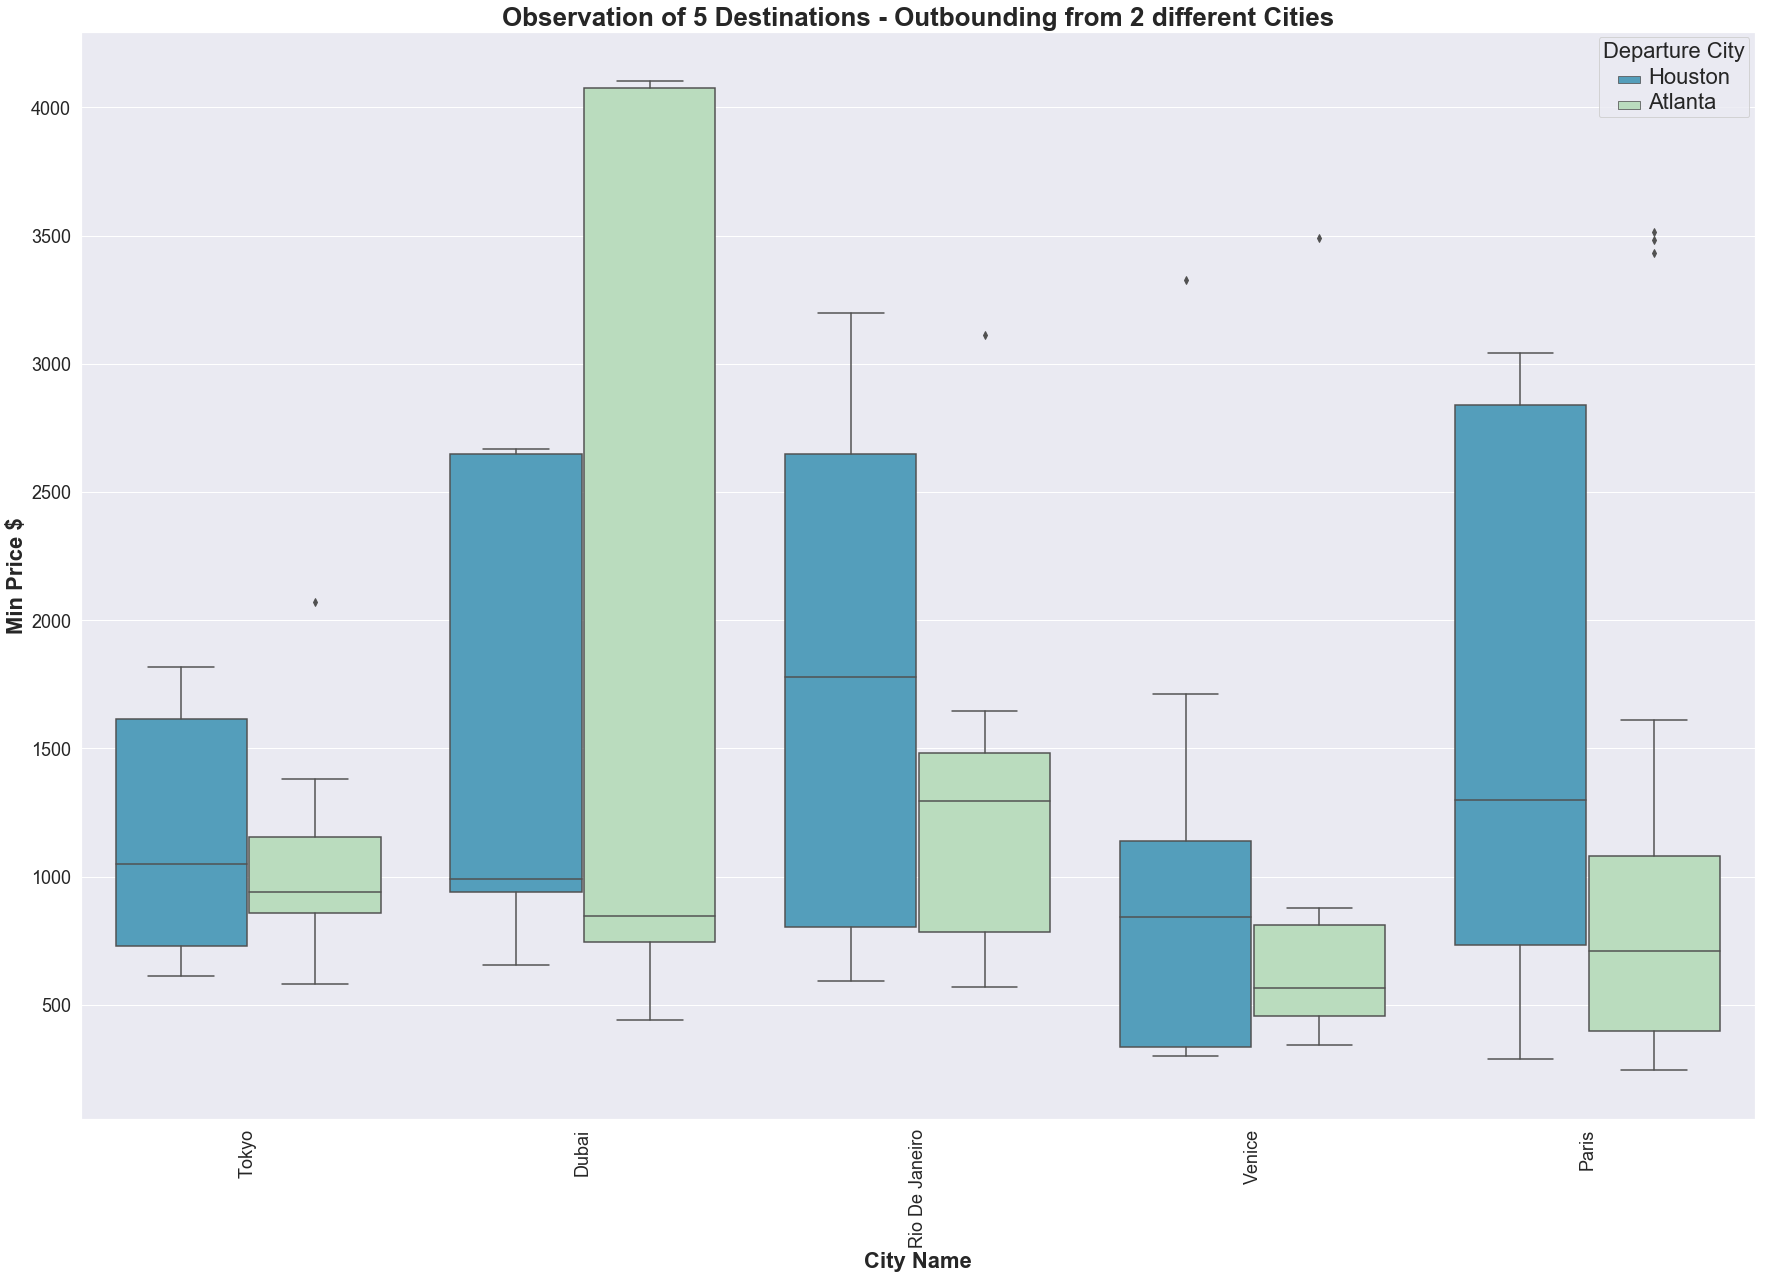

In [108]:
############################ Create one big combined table with all data #####################
append10 = Houston_data.append(Atlanta_data)
append20 = append10.append(NY_data)
append30 = append20.append(LA_data)
append40 = append30.append(Seattle_data)
combined_table = append40.append(Chicago_data)
#combined_table

####################### Append Two Departure Cities Data to compare ##############################

# Append first table
append2departure = Houston_data.append(Atlanta_data)

# Pull specific city tame from the append 2 cities table
g01 = append2departure[append2departure['City Name'] == 'Tokyo']
g02 = append2departure[append2departure['City Name'] == 'Dubai']
g03 = append2departure[append2departure['City Name'] == 'Rio De Janeiro']
g04 = append2departure[append2departure['City Name'] == 'Venice']
g05 = append2departure[append2departure['City Name'] == 'Paris']

# Append those specific cities together

appendHouATL01 = g01.append(g02)
appendHouATL02 = appendHouATL01.append(g03) 
appendHouATL03 = appendHouATL02.append(g04) 
appendHouATLcombined = appendHouATL03.append(g05) 

####################################### Box Plot Graph the 2 comparison ##############################################

# Seaborn box plot size 
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(30,20)})
# Start with a basic boxplot
box_plot2 = sns.boxplot(x=appendHouATLcombined["City Name"], y = appendHouATLcombined['Min Price'], data = appendHouATLcombined, hue = 'Departure City', dodge = True, width = 0.8,whis=1.5,fliersize=5, palette = "GnBu_r")
#Box plot x ticklabels rotation
plt.setp(box_plot2.get_xticklabels(), rotation=90)

#Formatting the boxplot picture
box_plot2.set_title("Observation of 5 Destinations - Outbounding from 2 different Cities", loc="center", fontsize = 26, fontweight = 'bold')
box_plot2.set_xlabel("City Name", fontsize = 22, fontweight = 'bold')
box_plot2.set_ylabel("Min Price $", fontsize = 22, fontweight = 'bold')
# Tick Size https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers
box_plot2.tick_params(labelsize=18)

#Modify Legend Size
#https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot

plt.setp(box_plot2.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(box_plot2.get_legend().get_title(), fontsize='22') # for legend title
# Save Image
plt.savefig("images/boxplot2cities.png", bbox_inches="tight")

In [104]:
################################################## ANOVA TEST ############################################### 

# First Extract individual groups
g01 = append2departure[append2departure['City Name'] == 'Tokyo']['Min Price']
g02 = append2departure[append2departure['City Name'] == 'Dubai']['Min Price']
g03 = append2departure[append2departure['City Name'] == 'Rio De Janeiro']['Min Price']
g04 = append2departure[append2departure['City Name'] == 'Venice']['Min Price']
g05 = append2departure[append2departure['City Name'] == 'Paris']['Min Price']

#Perform ANOVA Test
stats.f_oneway(g01, g02, g03, g04, g05)

F_onewayResult(statistic=3.708615771307178, pvalue=0.005870175293385188)

# T - Test (Independent Samples)
### Analyze whether two outbound cities have different average prices

In [32]:
append10 = Houston_data.append(Atlanta_data)
append20 = append10.append(NY_data)
append30 = append20.append(LA_data)
append40 = append30.append(Seattle_data)
combined_table = append40.append(Chicago_data)
combined_table.head()
#ombined_table_grouped = combined_table_df.groupby("City Name")
#combined_table_grouped_df = pd.DataFrame(combined_table_grouped)

#combined_table_grouped_df.sort_values('Min Price', ascending = False)
#random_city_price = combined_table_grouped_df.sample(n=10, replace = True)
#random_city_price
# Create a boxplot to compare means
#random_city_price.boxplot("Min Price", by="City Name", figsize=(20, 10))

#Calculate the population mean for prices in Houston
population1 = Houston_data['Min Price'].mean()
population1

#Calculate the population mean for prices in Los Angeles
population1 = NY_data['Min Price'].mean()


# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(population1, population1, equal_var=False)


Ttest_indResult(statistic=nan, pvalue=nan)

In [26]:
len(Houston_data)
len(Chicago_data)

1352

In [41]:
population = city_and_price_df_reset['Min Price']
sample = Houston_data['Min Price'].mean()

stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=nan, pvalue=nan)